In [ ]:
#5ecad9ade916f3bdac44b2a02d568e83b842b6299d4273641bda76386af171e3 10/11/2023 09:50
#9d2226289edf3794bd90a419c4aeae3d0a917778d20e9cd29b9adf9105cb6fb770bee9005f2246d87e16300d819e9484061f86c7b34975eca8e498d1120ce1f3 24/11/2023

In [3]:
import hashlib
import hmac
import math
import csv
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

2024-05-26 19:09:59.164071: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 19:09:59.259596: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 19:09:59.749949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 19:10:03.261262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
path = '/content/drive/MyDrive/Aviator/Data1/data(1).csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0   Odd  Odd_Categoria  odd_entrada  \
0                0  1.15              3         11.0   
1                1  1.19              3          3.0   
2                2  5.92             10          3.0   
3                3  1.11              2         10.0   
4                4  1.06              2          2.0   
...            ...   ...            ...          ...   
999984      999984  1.71              6         10.0   
999985      999985  5.16             10          6.0   
999986      999986  1.23              3         10.0   
999987      999987  9.00             10          3.0   
999988      999988  2.26              7         10.0   

        odd_categoria_media_movel5  odd_categoria_media_movel10  \
0                              6.4                          6.5   
1                              5.8                          6.1   
2                              5.0                          5.7   
3                              6.4                         

In [4]:
def getPrevHash(currHash):
	prevHash = hashlib.sha512()
	prevHash.update(currHash)
	return prevHash.hexdigest().encode("utf-8")

def hmacDivisible(hmacHash, mod):
	val = 0

	o = len(hmacHash) % 4

	i = o - 4 if o > 0 else 0

	while i < len(hmacHash):
		val = ((val << 16) + int(hmacHash[i : i + 4], 16)) % mod
		i += 4

	return (val == 0)

def getCrashFromHash(currHash):
	hmacCalculator = hmac.new(currHash, digestmod=hashlib.sha512)
	hmacCalculator.update(b"000000000000000007a9a31ff7f07463d91af6b5454241d5faf282e5e0fe1b3a")
	hmacHash = hmacCalculator.hexdigest().encode("utf-8").decode()
	if hmacDivisible(hmacHash, 101):
		return 0
	h = int(hmacHash[0 : 13], 16)
	e = math.pow(2, 52)
	return (math.floor((100 * e - h) / (e - h)) / 100)

limit = 200000
gameHash = input("Please enter a game hash to start with: ").encode("utf-8")
print("Writing past crashes to 'crashes.txt'...")
currHash = gameHash
outputFile = open(os.path.join(os.getcwd(), "crashes.csv"), "w")
csvWriter = csv.writer(outputFile)
csvWriter.writerow(["Game Hash", "Odd"])
for i in range(limit):
	csvWriter.writerow([currHash.decode(), str(getCrashFromHash(currHash))])
	currHash = getPrevHash(currHash)
outputFile.close()
print("Write complete!")

Writing past crashes to 'crashes.txt'...
Write complete!


In [5]:
data = pd.read_csv(os.path.join(os.path.join(os.getcwd(), "crashes.csv")))
data.head()

,Game Hash,Odd
0,9d2226289edf3794bd90a419c4aeae3d0a917778d20e9c...,3.36
1,1eeb512964f20924494b2f99142e11e4e84d91d1e2d912...,4.11
2,9ca71362f71dd4d52b22a53d3ef191a3c9f4d67039d1c6...,14.20
3,ccba4d9eab53e1aa627e92d9733e110234961d6a5326aa...,2.61
4,1d726703eec881f36dfad90e2d863ba4fac47feb9be14b...,1.62


In [6]:
# Inverter a ordem da lista
datas_invertidas = data[::-1]

# Exibir a lista invertida
print(datas_invertidas)

                                                Game Hash    Odd
199999  8209c24b45d7e80921f5ca335ce3c8950c3519379c721b...  25.40
199998  a554e1ffc3590ed71b2efab35d5e61819fc006ced9e341...   3.85
199997  fbb9ec6ed7638b1c7512de6d8162becf93c4e63669de1d...   6.96
199996  ef2765e7a618c894a39cf7a9dae098c88185a737fdf8cd...   5.41
199995  5a87ff3edf177568a3fa4cbcf3b5bae343bb0ed210056c...   1.05
...                                                   ...    ...
4       1d726703eec881f36dfad90e2d863ba4fac47feb9be14b...   1.62
3       ccba4d9eab53e1aa627e92d9733e110234961d6a5326aa...   2.61
2       9ca71362f71dd4d52b22a53d3ef191a3c9f4d67039d1c6...  14.20
1       1eeb512964f20924494b2f99142e11e4e84d91d1e2d912...   4.11
0       9d2226289edf3794bd90a419c4aeae3d0a917778d20e9c...   3.36

[200000 rows x 2 columns]


In [7]:
data = datas_invertidas.reset_index(drop=True)

In [8]:
data = data[['Odd']]
data

,Odd
0,25.40
1,3.85
2,6.96
3,5.41
4,1.05
...,...
199995,1.62
199996,2.61
199997,14.20
199998,4.11


In [9]:
data.head(-50)

,Odd
0,25.40
1,3.85
2,6.96
3,5.41
4,1.05
...,...
199945,1.13
199946,1.97
199947,3.50
199948,1.13


In [10]:
geral_cat = []
for name in data['Odd']:
  if name < 10:
    print(name)
    if name < 5:
      if name < 3.5:
        if name < 2.6:
          if name < 2.1:
            if name < 1.7:
              if name < 1.45:
                if name < 1.3:
                  if name < 1.15:
                    if name < 1.05:
                      geral_cat.append(1)
                    else:
                      geral_cat.append(2)
                  else:
                    geral_cat.append(3)
                else:
                  geral_cat.append(4)
              else:
                geral_cat.append(5)
            else:
              geral_cat.append(6)
          else:
            geral_cat.append(7)
        else:
          geral_cat.append(8)
      else:
        geral_cat.append(9)
    else:
      geral_cat.append(10)
  else:
    geral_cat.append(11)

print(len(geral_cat))
# Crie uma coluna 'Odd_Categoria' com os valores inteiros calculados
data['Odd_Categoria'] = geral_cat

# Remova as linhas com valores NaN em 'Odd_Categoria'
data = data.dropna(subset=['Odd_Categoria'])

# Garanta que 'Odd_Categoria' seja do tipo inteiro
data['Odd_Categoria'] = data['Odd_Categoria'].astype(int)

# Verifique os valores únicos em 'Odd_Categoria'
unique_classes = data['Odd_Categoria'].unique()
print(unique_classes)

data['Odd_Categoria'].describe()

3.85
6.96
5.41
1.05
1.7
3.88
1.3
1.86
1.86
5.35
5.15
1.15
1.75
2.27
1.63
6.23
3.1
1.01
1.28
1.18
1.13
2.12
9.03
1.75
1.5
1.44
1.6
1.34
7.79
2.81
8.53
9.56
1.06
2.26
2.01
1.36
2.23
2.45
1.54
2.8
5.42
4.28
0.0
1.19
3.46
1.98
1.37
1.07
8.9
1.37
1.13
1.43
7.17
1.12
6.42
4.17
1.12
2.28
3.15
1.72
1.54
1.31
1.4
4.84
1.36
1.65
3.98
2.08
1.19
5.15
1.52
1.63
1.31
1.49
4.02
1.17
4.24
1.03
2.07
2.85
4.08
1.65
2.98
6.0
5.9
3.36
1.54
1.12
1.11
4.87
1.17
1.08
1.11
2.89
1.68
1.19
5.7
3.57
5.24
4.98
3.43
2.0
1.04
1.02
2.39
1.78
3.89
4.16
6.11
2.49
1.26
1.01
1.82
1.26
6.45
2.68
1.24
2.82
1.31
2.33
4.36
2.19
4.64
7.05
1.59
5.4
1.07
1.58
4.24
3.05
1.33
1.21
1.12
1.11
2.83
1.33
1.93
1.12
1.8
1.3
1.49
1.17
1.13
2.69
1.32
8.12
1.51
1.07
7.99
2.07
3.05
1.36
1.91
1.07
6.85
1.04
4.35
1.78
1.71
1.45
5.47
1.99
1.78
4.31
1.56
1.66
1.12
1.14
1.18
1.32
2.8
1.3
1.43
1.91
1.14
2.43
1.53
1.18
1.63
1.3
7.76
1.1
1.27
1.77
3.59
2.11
1.36
1.16
3.43
1.06
5.99
1.52
1.4
6.54
2.77
1.57
3.15
2.57
2.33
1.3
6.72
1.05
7.14
4.19
1.

count    200000.000000
mean          6.244275
std           3.039207
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: Odd_Categoria, dtype: float64

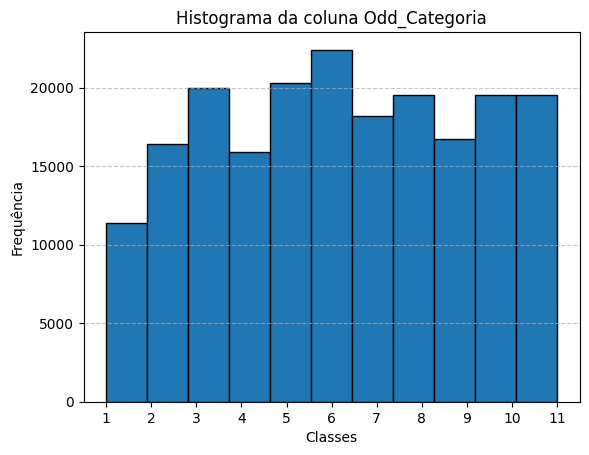

In [11]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [12]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['odd_entrada'] = data['Odd_Categoria'].shift(1)

new_data = new_data.drop(new_data.index[0])
# Visualize o DataFrame new_data
print(new_data)

data = pd.concat([data, new_data], axis = 1)

data = data.drop(data.index[0]).reset_index(drop=True)

        odd_entrada
1              11.0
2               9.0
3              10.0
4              10.0
5               2.0
...             ...
199995         11.0
199996          5.0
199997          8.0
199998         11.0
199999          9.0

[199999 rows x 1 columns]


In [13]:
data

,Odd,Odd_Categoria,odd_entrada
0,3.85,9,11.0
1,6.96,10,9.0
2,5.41,10,10.0
3,1.05,2,10.0
4,1.70,6,2.0
...,...,...,...
199994,1.62,5,11.0
199995,2.61,8,5.0
199996,14.20,11,8.0
199997,4.11,9,11.0


In [15]:
data.to_csv("/home/darkcover/Documentos/Out/dados/odds_200k.csv")

In [ ]:
data['odd_categoria_media_movel5'] = data['odd_entrada'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['odd_entrada'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['odd_entrada'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['odd_entrada'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['odd_entrada'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['odd_entrada'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna-

# Estatísticas Descritivas
data['odd_mediana20'] = data['odd_entrada'].rolling(window=20).median()

data['odd_min10'] = data['odd_entrada'].rolling(window=10).min()
data['odd_min20'] = data['odd_entrada'].rolling(window=20).min()
data['odd_min40'] = data['odd_entrada'].rolling(window=40).min()

data['odd_max10'] = data['odd_entrada'].rolling(window=10).max()

# Tendência de Média Móvel
data['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['categoria_frequencia20'] = data['odd_entrada'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())

data['entropia_rolling5'] = data['odd_entrada'].rolling(window=5).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling320'] = data['odd_entrada'].rolling(window=320).apply(lambda x: entropy(x.value_counts(normalize=True)))

# Correlações (exemplo com 'media_movel_segundo5')
data['correlacao_odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).corr(data['odd_categoria_media_movel10'])
data['correlacao_odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).corr(data['odd_categoria_media_movel640'])

data['correlacao_odd_categoria_media_movel10'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel640'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Contagem de repetições das categorias
data['categoria_contagem'] = data['odd_entrada'].map(data['odd_entrada'].value_counts())

data['variancia_rolling10'] = data['odd_entrada'].rolling(window=10).var()
data['variancia_rolling20'] = data['odd_entrada'].rolling(window=20).var()
data['variancia_rolling320'] = data['odd_entrada'].rolling(window=320).var()

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

Series([], dtype: int64)


(999999, 26)

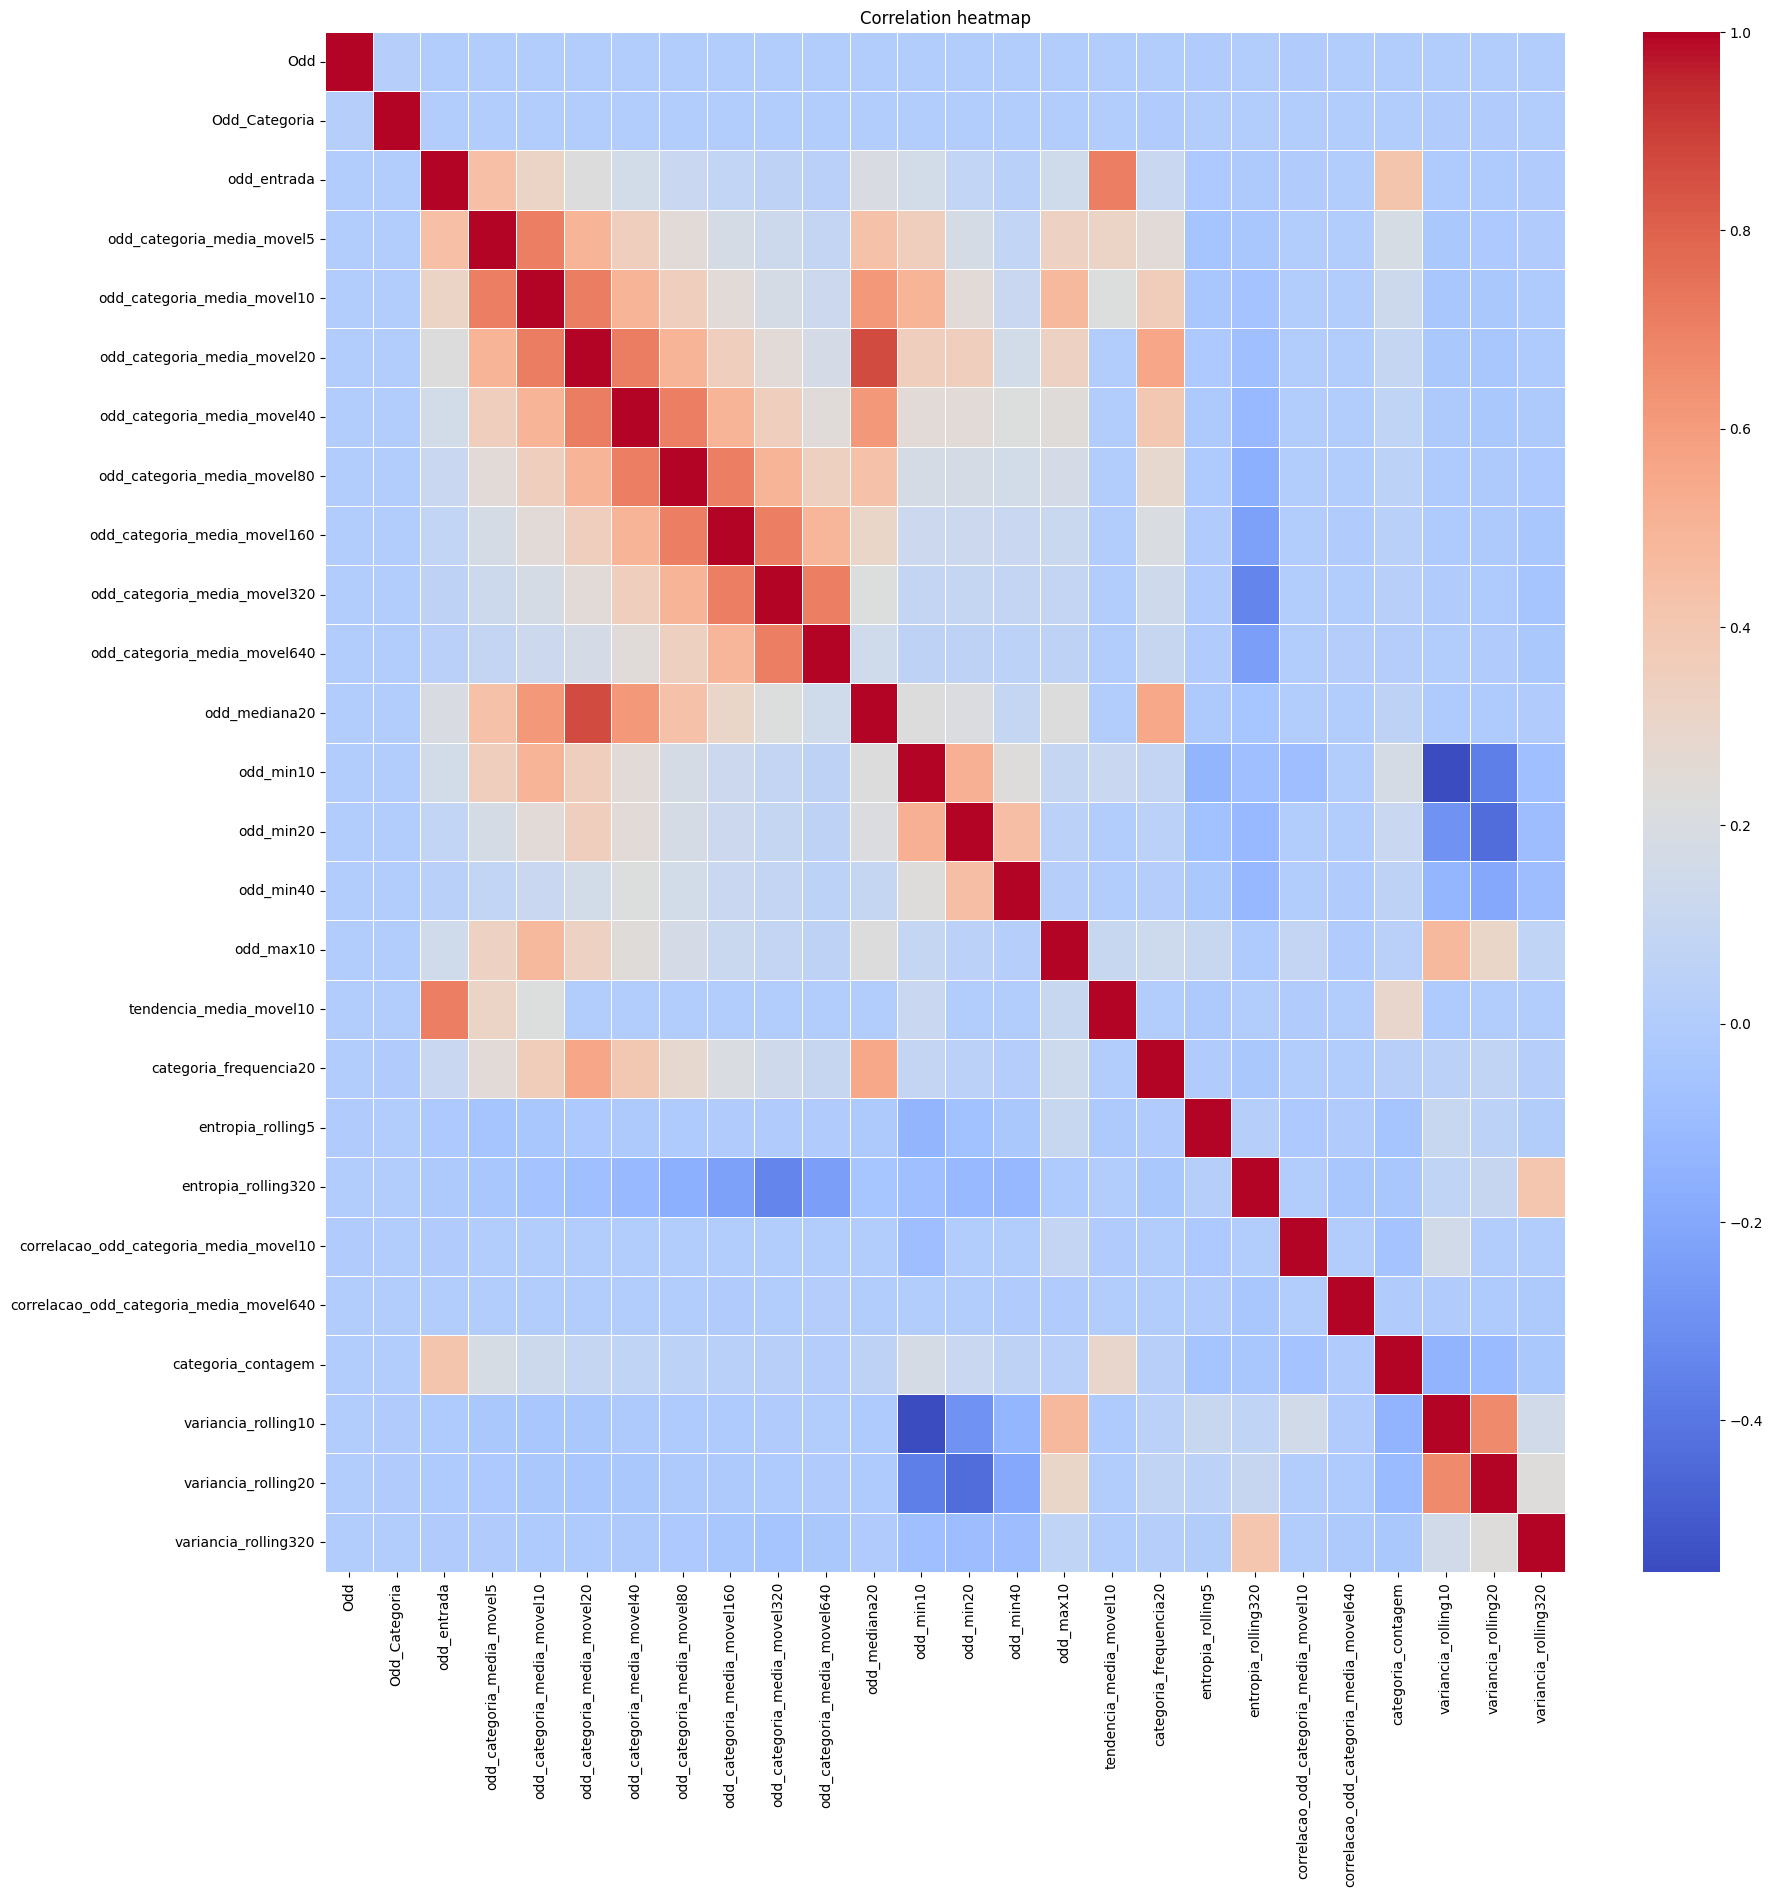

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'Odd', 'Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [ ]:
data2 = data

In [ ]:
array = pd.array(data['odd_entrada'])

In [ ]:
array1 = array[1:]
array2 = array[2:]
array3 = array[3:]
array4 = array[4:]
array5 = array[5:]
array6 = array[6:]
array7 = array[7:]
array8 = array[8:]
array9 = array[9:]
array10 = array[10:]

In [ ]:
print(len(data),len(array1),len(array2),len(array3),len(array4),len(array5),len(array6),len(array7),len(array8),len(array9),len(array10))

999999 999998 999997 999996 999995 999994 999993 999992 999991 999990 999989


In [ ]:
array1 = array1[9:]
array2 = array2[8:]
array3 = array3[7:]
array4 = array4[6:]
array5 = array5[5:]
array6 = array6[4:]
array7 = array7[3:]
array8 = array8[2:]
array9 = array9[1:]

In [ ]:
print(len(data),len(array1),len(array2),len(array3),len(array4),len(array5),len(array6),len(array7),len(array8),len(array9),len(array10))

999999 999989 999989 999989 999989 999989 999989 999989 999989 999989 999989


In [ ]:
data = data.iloc[10:].reset_index(drop=True)
print(len(data))

999989


In [ ]:
array1 = pd.DataFrame({'1entrada-anterior': array1})
array2 = pd.DataFrame({'2entrada-anterior': array2})
array3 = pd.DataFrame({'3entrada-anterior': array3})
array4 = pd.DataFrame({'4entrada-anterior': array4})
array5 = pd.DataFrame({'5entrada-anterior': array5})
array6 = pd.DataFrame({'6entrada-anterior': array6})
array7 = pd.DataFrame({'7entrada-anterior': array7})
array8 = pd.DataFrame({'8entrada-anterior': array8})
array9 = pd.DataFrame({'9entrada-anterior': array9})
array10 = pd.DataFrame({'10entrada-anterior': array10})

In [ ]:
data = pd.concat([data, array1, array2, array3, array4, array5, array6, array7, array8, array9, array10], axis = 1)

In [ ]:
data.columns

Index(['Odd', 'Odd_Categoria', 'odd_entrada', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel10', 'odd_categoria_media_movel20',
       'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
       'odd_categoria_media_movel160', 'odd_categoria_media_movel320',
       'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
       'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [ ]:
data2 = data
data

,Unnamed: 0,Odd,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,0,1.15,3,11.0,6.4,6.5,6.245461,6.245462,6.245477,6.24550,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,1,1.19,3,3.0,5.8,6.1,6.245461,6.245462,6.245477,6.24550,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2,5.92,10,3.0,5.0,5.7,6.245461,6.245462,6.245477,6.24550,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3,1.11,2,10.0,6.4,6.1,6.245461,6.245462,6.245477,6.24550,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,4,1.06,2,2.0,5.8,5.5,6.245461,6.245462,6.245477,6.24550,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,999984,1.71,6,10.0,6.6,6.4,6.700000,6.025000,5.862500,6.06875,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
999985,999985,5.16,10,6.0,6.2,6.1,6.450000,6.000000,5.912500,6.03750,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
999986,999986,1.23,3,10.0,7.4,6.6,6.750000,6.075000,5.937500,6.03750,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
999987,999987,9.00,10,3.0,6.8,5.9,6.700000,6.100000,5.962500,6.01875,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


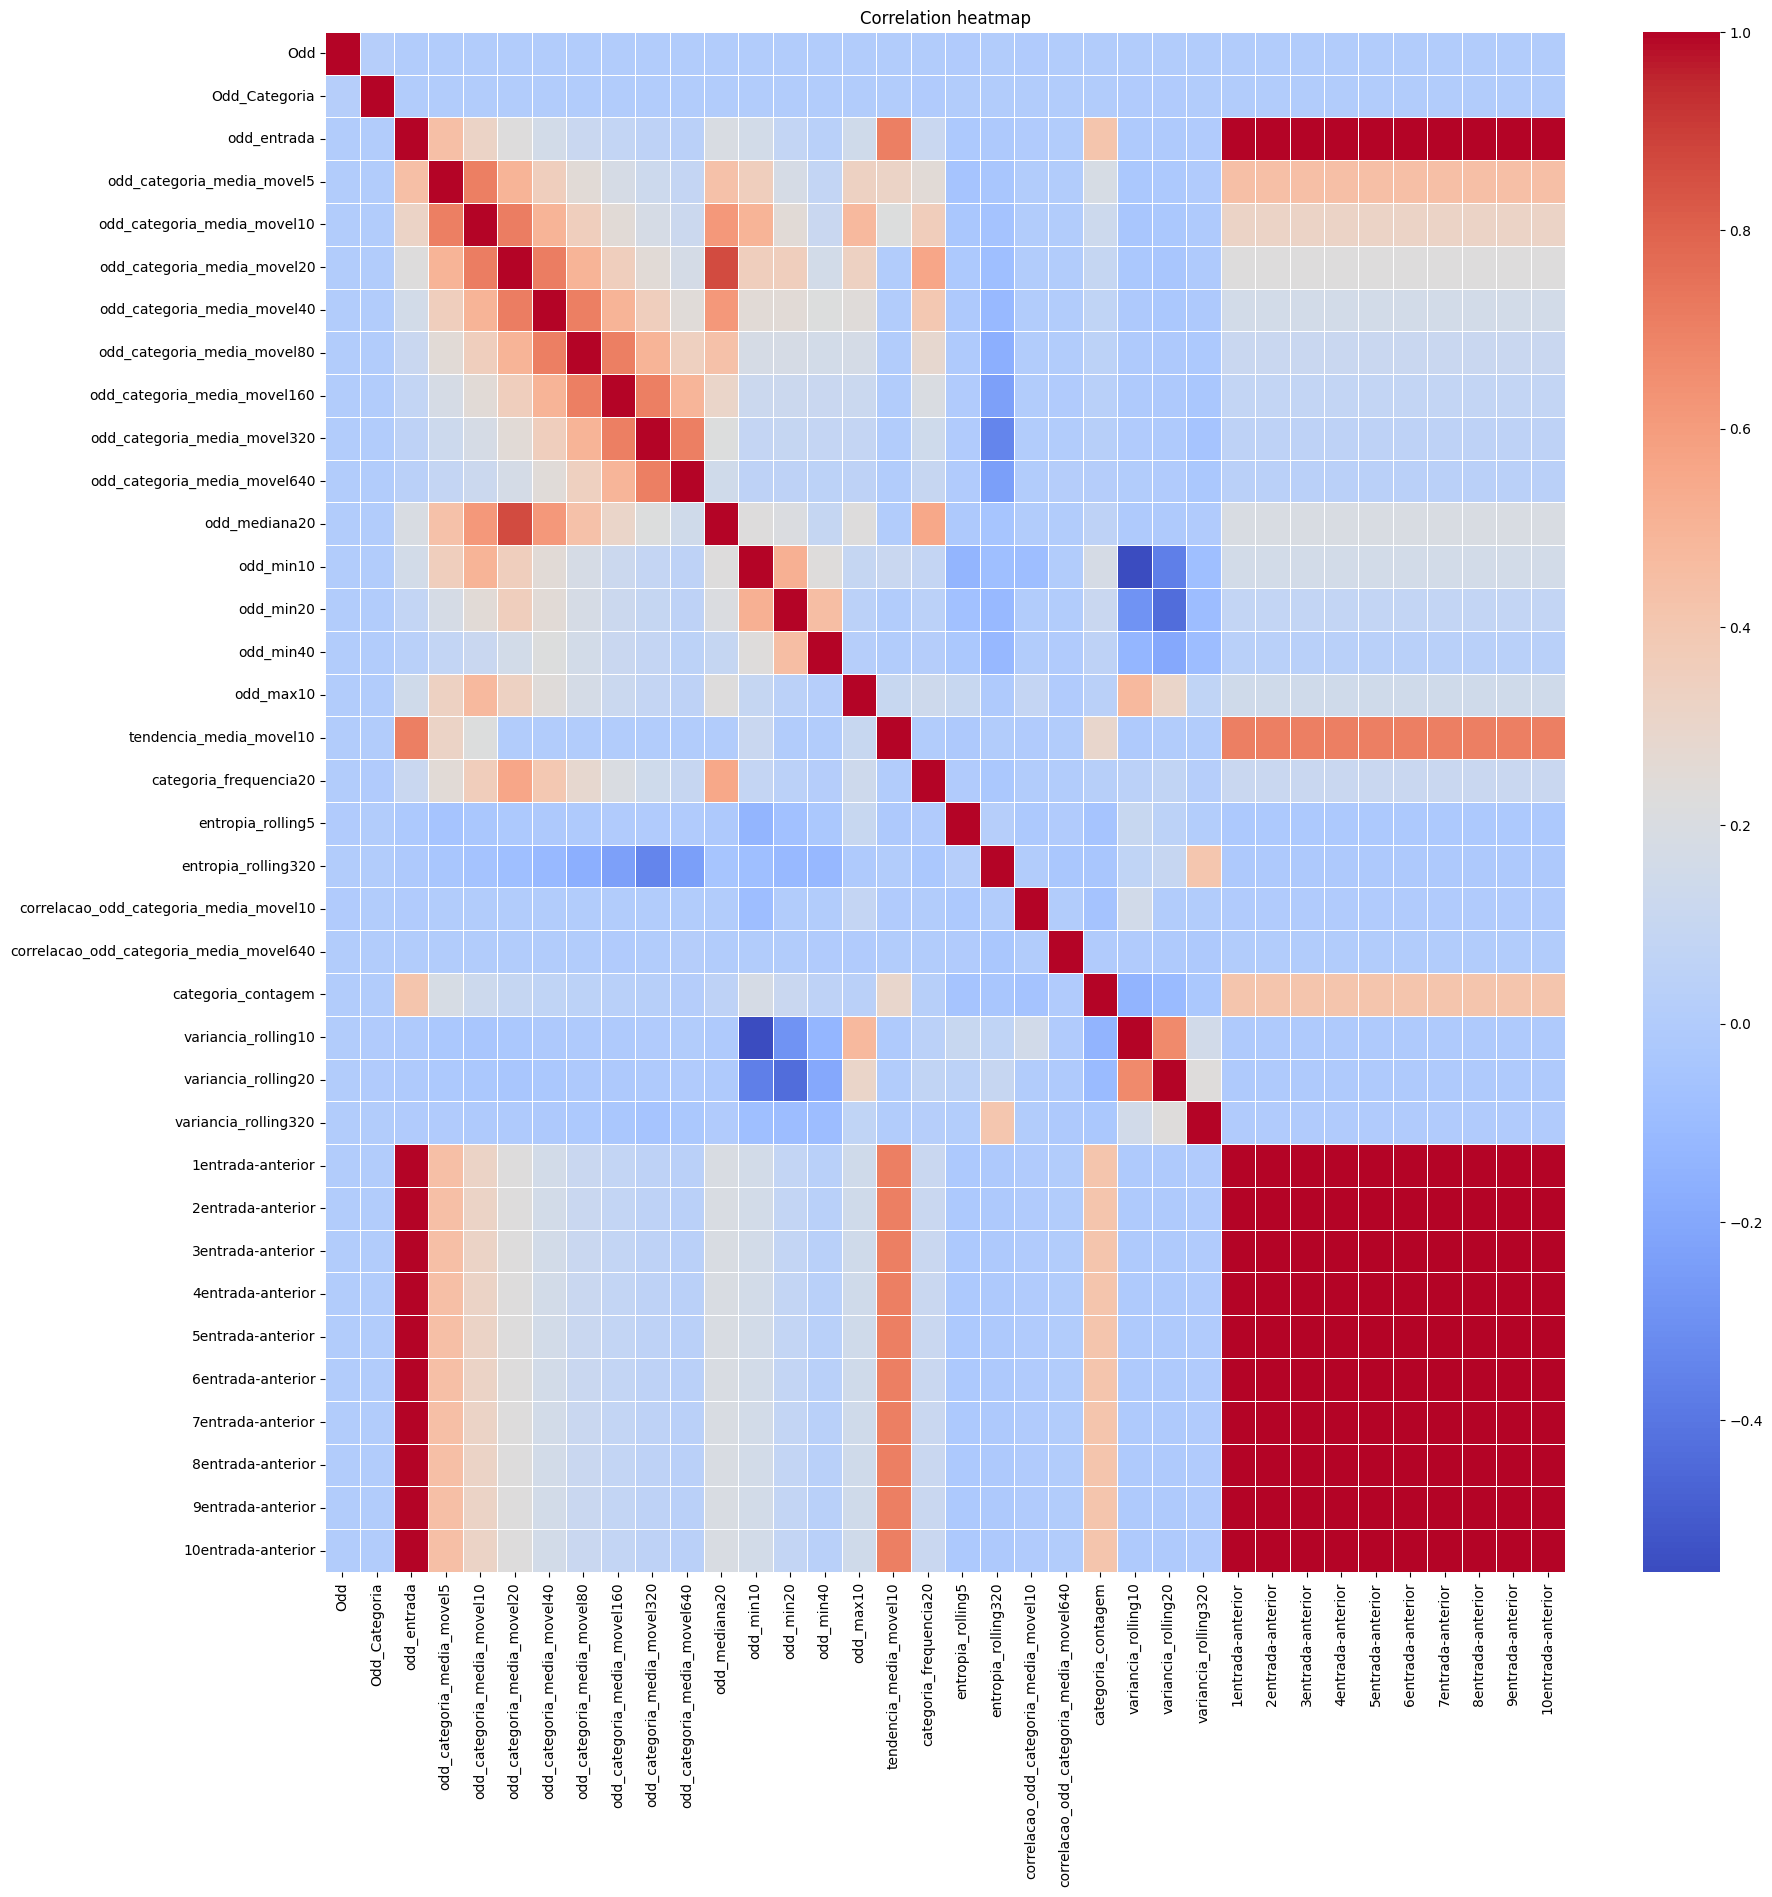

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.to_csv('data.csv')

In [ ]:
data['Odd_Categoria'].describe()

count    999989.000000
mean          6.245464
std           3.047609
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: Odd_Categoria, dtype: float64

In [ ]:
data = data[['Odd_Categoria','odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',]]

In [ ]:
unique_classes = data['Odd_Categoria'].unique()
print(unique_classes)

[ 3 10  2 11  5  9  7  6  4  8  1]


In [ ]:
data = data.tail(250000).reset_index(drop=True)
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,tendencia_media_movel10,categoria_frequencia20,entropia_rolling5,entropia_rolling320,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel640,categoria_contagem,variancia_rolling10,variancia_rolling20,variancia_rolling320
0,7,9.0,5.6,6.5,6.15,5.850,5.5625,5.97500,5.956250,6.082813,...,0.8,9.0,1.332179,2.374294,0.426315,0.050580,84779,9.611111,11.292105,9.408738
1,4,7.0,6.6,6.5,5.95,5.875,5.5500,6.01250,5.975000,6.079688,...,0.0,9.0,1.609438,2.372732,0.506655,0.046394,90869,9.611111,10.050000,9.334796
2,2,4.0,7.0,6.3,6.05,5.925,5.5125,5.96875,5.953125,6.082813,...,-0.2,9.0,1.332179,2.372847,0.459047,0.052936,78755,10.233333,9.418421,9.267388
3,4,2.0,6.6,5.9,6.00,5.775,5.4625,5.94375,5.946875,6.073437,...,-0.4,9.0,1.609438,2.371522,0.494197,0.056031,82822,12.100000,9.789474,9.304379
4,2,4.0,5.2,5.4,6.00,5.850,5.3750,5.94375,5.934375,6.068750,...,-0.5,9.0,1.332179,2.371961,0.435852,0.057659,78755,11.155556,9.789474,9.302890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,0.2,4.0,1.609438,2.379376,0.226360,-0.015824,98303,7.377778,7.694737,8.882602
249996,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,-0.3,4.0,1.332179,2.379376,0.208640,-0.017045,110738,6.544444,6.681579,8.882602
249997,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,0.5,10.0,1.054920,2.380744,0.191202,-0.010587,98303,7.822222,6.934211,8.933542
249998,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,-0.7,10.0,1.332179,2.380283,0.096509,-0.011337,100260,7.433333,7.273684,8.958268


In [ ]:
data2 = data
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,tendencia_media_movel10,categoria_frequencia20,entropia_rolling5,entropia_rolling320,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel640,categoria_contagem,variancia_rolling10,variancia_rolling20,variancia_rolling320
0,7,9.0,5.6,6.5,6.15,5.850,5.5625,5.97500,5.956250,6.082813,...,0.8,9.0,1.332179,2.374294,0.426315,0.050580,84779,9.611111,11.292105,9.408738
1,4,7.0,6.6,6.5,5.95,5.875,5.5500,6.01250,5.975000,6.079688,...,0.0,9.0,1.609438,2.372732,0.506655,0.046394,90869,9.611111,10.050000,9.334796
2,2,4.0,7.0,6.3,6.05,5.925,5.5125,5.96875,5.953125,6.082813,...,-0.2,9.0,1.332179,2.372847,0.459047,0.052936,78755,10.233333,9.418421,9.267388
3,4,2.0,6.6,5.9,6.00,5.775,5.4625,5.94375,5.946875,6.073437,...,-0.4,9.0,1.609438,2.371522,0.494197,0.056031,82822,12.100000,9.789474,9.304379
4,2,4.0,5.2,5.4,6.00,5.850,5.3750,5.94375,5.934375,6.068750,...,-0.5,9.0,1.332179,2.371961,0.435852,0.057659,78755,11.155556,9.789474,9.302890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,0.2,4.0,1.609438,2.379376,0.226360,-0.015824,98303,7.377778,7.694737,8.882602
249996,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,-0.3,4.0,1.332179,2.379376,0.208640,-0.017045,110738,6.544444,6.681579,8.882602
249997,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,0.5,10.0,1.054920,2.380744,0.191202,-0.010587,98303,7.822222,6.934211,8.933542
249998,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,-0.7,10.0,1.332179,2.380283,0.096509,-0.011337,100260,7.433333,7.273684,8.958268


In [ ]:
data = data.tail(500000).reset_index(drop=True)
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,4,8.0,7.4,5.6,6.50,6.000,5.8875,5.81250,5.978125,6.090625,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,1,4.0,7.4,5.8,6.30,5.975,5.9125,5.78750,5.962500,6.087500,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,1.0,5.8,5.6,6.05,5.875,5.8875,5.73750,5.934375,6.085938,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,10,3.0,4.8,5.6,5.70,5.900,5.8000,5.68750,5.931250,6.075000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,7,10.0,5.2,5.7,5.80,6.000,5.9000,5.71875,5.959375,6.089062,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
499996,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
499997,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
499998,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 23ms/step
Precisão: 0.08101581015810158
Acurácia Direcional: 0.42470424704247045
Acurácia Direcional Ponderada: 0.505720057200572


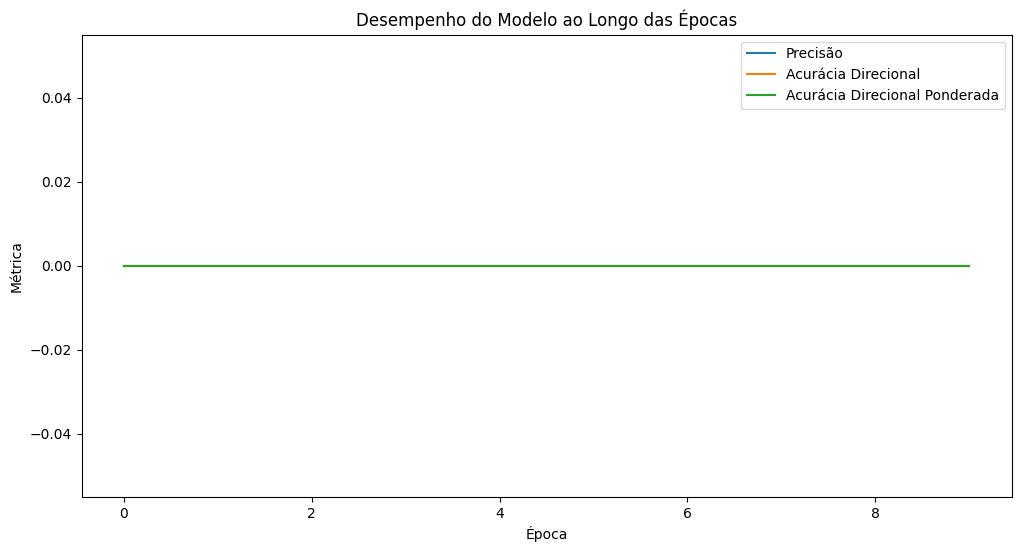

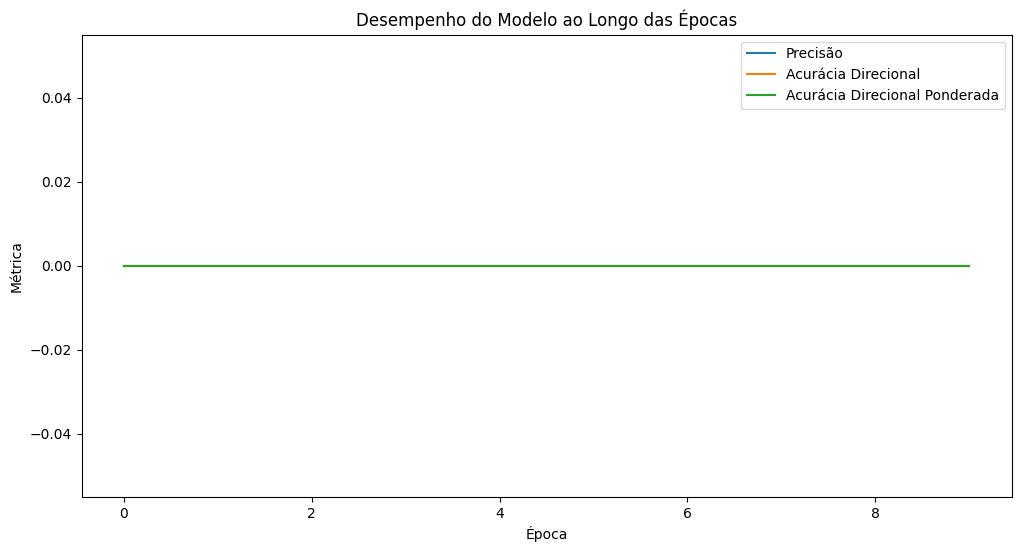

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt


class DQNAgent:
  def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon, buffer_size=10000):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.memory = deque(maxlen=buffer_size)

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='sparse_categorical_crossentropy')

  def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(self.n_actions, activation='softmax')
        ])
        return model

  def get_action(self, state):
    if np.random.random() < self.epsilon:
      return np.random.choice(self.n_actions)
    else:
      q_values = self.model.predict(state.reshape(1, -1), batch_size=1)
      return np.argmax(q_values)

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

    # Restante do código permanece igual até o método 'replay'
  def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1), batch_size=1)))
            target_f = self.model.predict(state.reshape(1, -1), batch_size=1)
            target_f[0][action] = target
            self.model.fit(state.reshape(1, -1), np.array([action]), epochs=1, verbose=0, batch_size=batch_size)

  def update_epsilon(self, decay_rate, min_epsilon):
    if self.epsilon > min_epsilon:
      self.epsilon *= decay_rate

def calculate_reward(action, true_action):
  base_reward = 10  # Recompensa base para acertos exatos
  good_error_reward = 5  # Recompensa para erros bons
  bad_error_penalty = -5  # Penalidade para erros ruins

  # Recompensas e penalidades adicionais para categorias específicas
  extra_good_reward = 3  # Recompensa adicional para erros bons próximos a categorias valiosas
  extra_bad_penalty = -3  # Penalidade adicional para erros ruins próximos a categorias valiosas
  valuable_categories = [7, 8, 9, 10, 11]

  if action == true_action:
    return base_reward
  elif action < true_action:
    reward = good_error_reward
    if true_action in valuable_categories and action in valuable_categories:
      reward += extra_good_reward  # Recompensa extra por estar próximo de categorias valiosas
    return reward
  else:
    penalty = bad_error_penalty
    if true_action in valuable_categories or action in valuable_categories:
      penalty += extra_bad_penalty  # Penalidade extra por estar distante de categorias valiosas
    return penalty


def normalize_data(features):
  scaler = StandardScaler()
  return scaler.fit_transform(features)

def main():
# Recursos (variáveis de entrada)
  features = data[['odd_entrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
                     '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                     '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior',
                     '9entrada-anterior', '10entrada-anterior']].values

    # Recompensas (variável de saída)
  rewards = data['Odd_Categoria'].values
  features = normalize_data(features)
    # Separe os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Parâmetros de treinamento
  n_epochs = 10  # Número de épocas de treinamento
  batch_size = 32  # Tamanho do lote para treinamento

  # Crie o agente DQN
  n_states = X_train.shape[1]
  n_actions = len(np.unique(y_train))
  dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=1.0, buffer_size=5000)

  epoch_accuracies = []
  epoch_directional_accuracies = []
  epoch_weighted_directional_accuracies = []

  # Treinamento do agente
  for epoch in range(n_epochs):
    # Calculando as métricas no final de cada época
    correct_predictions, overestimations, weighted_correct_predictions, weighted_overestimations = 0, 0, 0, 0

    for i in range(len(X_train) - 1):
      state = X_train[i, :]
      action = dqn_agent.get_action(state)
      true_action = y_train[i]
      reward = calculate_reward(action, true_action)
      next_state = X_train[i + 1, :]
      done = (i == len(X_train) - 2)

      dqn_agent.remember(state, action, reward, next_state, done)

      if done:
        dqn_agent.replay(batch_size)
        dqn_agent.update_epsilon(0.995, 0.01)

    accuracy = correct_predictions / len(X_test)
    directional_accuracy = (correct_predictions + overestimations) / len(X_test)
    weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

    epoch_accuracies.append(accuracy)
    epoch_directional_accuracies.append(directional_accuracy)
    epoch_weighted_directional_accuracies.append(weighted_directional_accuracy)

  # Inicialize listas para coletar dados de erro
  erros = []
  tipos_de_erro = {'subestimacao': [], 'superestimacao': []}
  # Teste o agente
  correct_predictions = 0
  overestimations = 0
  weighted_correct_predictions = 0
  weighted_overestimations = 0

  for i in range(len(X_test)):
    state = X_test[i, :]
    action = dqn_agent.get_action(state)
    true_action = y_test[i]

    # Cálculo do erro
    erro = action - true_action
    erros.append(erro)

    # Classificando o tipo de erro
    if erro < 0:
      tipos_de_erro['subestimacao'].append(erro)
    elif erro > 0:
      tipos_de_erro['superestimacao'].append(erro)

    # Atualize as métricas
    if action == true_action:
      correct_predictions += 1
      weighted_correct_predictions += 2  # Peso maior para acertos
    elif action > true_action:
      overestimations += 1
      weighted_overestimations += 1  # Peso menor para erros

    # Calcule a precisão
  accuracy = correct_predictions / len(X_test)

    # Calcule a Acurácia Direcional
  directional_accuracy = (correct_predictions + overestimations) / len(X_test)

    # Calcule a Acurácia Direcional Ponderada
  weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

  print("Precisão:", accuracy)
  print("Acurácia Direcional:", directional_accuracy)
  print("Acurácia Direcional Ponderada:", weighted_directional_accuracy)

  plt.figure(figsize=(12, 6))
  plt.plot(epoch_accuracies, label='Precisão')
  plt.plot(epoch_directional_accuracies, label='Acurácia Direcional')
  plt.plot(epoch_weighted_directional_accuracies, label='Acurácia Direcional Ponderada')
  plt.xlabel('Época')
  plt.ylabel('Métrica')
  plt.title('Desempenho do Modelo ao Longo das Épocas')
  plt.legend()
  plt.show()

  # Plotagem do gráfico de desempenho ao longo das épocas
  plt.figure(figsize=(12, 6))
  plt.plot(epoch_accuracies, label='Precisão')
  plt.plot(epoch_directional_accuracies, label='Acurácia Direcional')
  plt.plot(epoch_weighted_directional_accuracies, label='Acurácia Direcional Ponderada')
  plt.xlabel('Época')
  plt.ylabel('Métrica')
  plt.title('Desempenho do Modelo ao Longo das Épocas')
  plt.legend()
  plt.show()

  dqn_agent.model.save('AgenteAv.h5')

if __name__ == "__main__":
  main()


In [ ]:
path = '/content/drive/MyDrive/Aviator/Data1/AgenteAv.h5'
model = load_model(path)


In [ ]:
data = data2
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,3,11.0,6.4,6.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,3,3.0,5.8,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,10,3.0,5.0,5.7,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,2,10.0,6.4,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,2,2.0,5.8,5.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,6,10.0,6.6,6.4,6.700000,6.025000,5.862500,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
999985,10,6.0,6.2,6.1,6.450000,6.000000,5.912500,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
999986,3,10.0,7.4,6.6,6.750000,6.075000,5.937500,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
999987,10,3.0,6.8,5.9,6.700000,6.100000,5.962500,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
data = data.tail(700).reset_index(drop=True)
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,11,7.0,6.2,6.2,5.75,5.750,5.6375,6.05000,5.890625,6.000000,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,3,11.0,7.8,6.8,5.95,5.750,5.7000,6.05000,5.893750,6.012500,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,3,3.0,7.4,6.4,5.80,5.750,5.6875,6.05000,5.881250,6.014062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3,3.0,7.0,6.2,5.90,5.625,5.5875,6.05000,5.871875,6.010937,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,8,3.0,5.4,5.4,5.90,5.625,5.5250,6.00625,5.871875,5.998437,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
696,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
697,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
698,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,11,7.0,6.2,6.2,5.75,5.750,5.6375,6.05000,5.890625,6.000000,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1,3,11.0,7.8,6.8,5.95,5.750,5.7000,6.05000,5.893750,6.012500,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,3,3.0,7.4,6.4,5.80,5.750,5.6875,6.05000,5.881250,6.014062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3,3.0,7.0,6.2,5.90,5.625,5.5875,6.05000,5.871875,6.010937,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,8,3.0,5.4,5.4,5.90,5.625,5.5250,6.00625,5.871875,5.998437,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
696,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
697,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
698,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Carregar o modelo treinado
path = '/content/drive/MyDrive/Aviator/Data1/AgenteAv.h5'
loaded_model = load_model(path)

# Definir parâmetros do agente
n_states = 34 # O número de características do estado
n_actions = 11 # O número de ações possíveis

class DQNAgent:
  def __init__(self, n_states, n_actions, epsilon, model=None):
        self.n_states = n_states
        self.n_actions = n_actions
        self.epsilon = epsilon
        self.model = model if model is not None else self.build_model()

  def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(self.n_actions, activation='softmax')
        ])
        return model

  def get_action(self, state):
    if np.random.random() < self.epsilon:
      return np.random.choice(self.n_actions)
    else:
      q_values = self.model.predict(state.reshape(1, -1), batch_size=1)
      return np.argmax(q_values)

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

    # Restante do código permanece igual até o método 'replay'
  def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1), batch_size=1)))
            target_f = self.model.predict(state.reshape(1, -1), batch_size=1)
            target_f[0][action] = target
            self.model.fit(state.reshape(1, -1), np.array([action]), epochs=1, verbose=0, batch_size=batch_size)

  def update_epsilon(self, decay_rate, min_epsilon):
    if self.epsilon > min_epsilon:
      self.epsilon *= decay_rate

# Inicializar DQNAgent e definir o modelo carregado
new_agent = DQNAgent(n_states, n_actions, epsilon=0.01, model=loaded_model)

def converter_para_categoria(odd):
    name = odd
    if name < 1.05:
        odd_categoria = 1
        return odd_categoria
    elif name >= 1.05 and name < 1.15:
        odd_categoria = 2
        return odd_categoria
    elif name >= 1.15 and name < 1.3:
        odd_categoria = 3
        return odd_categoria
    elif name >= 1.3 and name < 1.45:
        odd_categoria = 4
        return odd_categoria
    elif name >= 1.45 and name < 1.7:
        odd_categoria = 5
        return odd_categoria
    elif name >= 1.7 and name < 2.1:
        odd_categoria = 6
        return odd_categoria
    elif name >= 2.1 and name < 2.6:
        odd_categoria = 7
        return odd_categoria
    elif name >= 2.6 and name < 3.5:
        odd_categoria = 8
        return odd_categoria
    elif name >= 3.5 and name < 5:
        odd_categoria = 9
        return odd_categoria
    elif name >= 5 and name < 10:
        odd_categoria = 10
        return odd_categoria
    elif name >= 10:
        odd_categoria = 11
        return odd_categoria

# Função para calcular as features necessárias com base na última odd
def calcular_features(data ,ultima_odd):
    # Copiando a última linha e atualizando com a nova odd
    nova_linha = data.iloc[-1].copy()
    nova_linha['odd_entrada'] = ultima_odd

    nova_linha['odd_categoria_media_movel5'] = data['odd_entrada'].rolling(window=5).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel20'] = data['odd_entrada'].rolling(window=20).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel40'] = data['odd_entrada'].rolling(window=40).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel80'] = data['odd_entrada'].rolling(window=80).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel160'] = data['odd_entrada'].rolling(window=160).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel320'] = data['odd_entrada'].rolling(window=320).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).mean().iloc[-1]

    # Estatísticas Descritivas
    nova_linha['odd_mediana20'] = data['odd_entrada'].rolling(window=20).median().iloc[-1]

    nova_linha['odd_min10'] = data['odd_entrada'].rolling(window=10).min().iloc[-1]
    nova_linha['odd_min20'] = data['odd_entrada'].rolling(window=20).min().iloc[-1]
    nova_linha['odd_min40'] = data['odd_entrada'].rolling(window=40).min().iloc[-1]

    nova_linha['odd_max10'] = data['odd_entrada'].rolling(window=10).max().iloc[-1]

    # Tendência de Média Móvel
    nova_linha['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff().iloc[-1]

    # Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
    nova_linha['categoria_frequencia20'] = data['odd_entrada'].rolling(window=20).apply(lambda x: x.value_counts().idxmax()).iloc[-1]

    nova_linha['entropia_rolling5'] = data['odd_entrada'].rolling(window=5).apply(lambda x: entropy(x.value_counts(normalize=True))).iloc[-1]
    nova_linha['entropia_rolling320'] = data['odd_entrada'].rolling(window=320).apply(lambda x: entropy(x.value_counts(normalize=True))).iloc[-1]

    # Correlações (exemplo com 'media_movel_segundo5')
    nova_linha['correlacao_odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).corr(data['odd_categoria_media_movel10']).iloc[-1]
    nova_linha['correlacao_odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).corr(data['odd_categoria_media_movel640']).iloc[-1]

    #nova_linha['correlacao_odd_categoria_media_movel10'].replace([np.inf, -np.inf], np.nan, inplace=True)
    #nova_linha['correlacao_odd_categoria_media_movel640'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Contagem de repetições das categorias
    nova_linha['categoria_contagem'] = data['odd_entrada'].map(data['odd_entrada'].value_counts()).iloc[-1]

    nova_linha['variancia_rolling10'] = data['odd_entrada'].rolling(window=10).var().iloc[-1]
    nova_linha['variancia_rolling20'] = data['odd_entrada'].rolling(window=20).var().iloc[-1]
    nova_linha['variancia_rolling320'] = data['odd_entrada'].rolling(window=320).var().iloc[-1]

    # Remova linhas com valores ausentes resultantes das operações de janelas
    #nova_linha = data.fillna(data.mean())

    # Verifique se há valores nulos em cada coluna
    valores_ausentes = data.isna().sum()

    # Exiba as colunas com valores nulos e suas contagens
    print(valores_ausentes[valores_ausentes > 0])

    # Atualizando as entradas anteriores
    for i in range(1, 11):
      nova_linha[f'{i}entrada-anterior'] = data['odd_entrada'].shift(i).iloc[-1]

    features = pd.DataFrame([nova_linha])

    #print(features)
    # Retornando a última linha com as features atualizadas
    return features

def normalizar_features(features):
    scaler = StandardScaler()
    # Converter a primeira entrada da lista para um DataFrame
    #print(type(features), len(features), features.columns)
    # Selecionar as colunas desejadas para normalização
    features_selecionadas = features[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']]

    # Normalizar as features selecionadas
    x = scaler.fit_transform(features_selecionadas)
    return x

resultados = pd.DataFrame()

# Loop principal para predições
for i in range(1000):
  print(24*'*-' + '*')
  print(i)
  ultima_odd = float(input("Insira a última odd: "))

  if ultima_odd == 0:
    break

  # Atualizar a entrada mais recente com a última odd
  categoria_real = converter_para_categoria(ultima_odd)

  if i != 0:
    data.loc[len(data)-2, 'Odd_Categoria'] = categoria_real

  # Calcular features para a nova entrada
  nova_feature = calcular_features(data, categoria_real)
  features_normalizadas = normalizar_features(nova_feature)

  # Substitua esta linha pelo agente DQN para fazer a predição
  categoria_prevista = new_agent.get_action(features_normalizadas.reshape(1, -1))

  # Atualizar a categoria prevista na última entrada
  nova_feature['Odd_Categoria'] = categoria_prevista

  print("Categoria Prevista:", categoria_prevista)
  # Adicionar a linha com as features e a predição ao DataFrame de resultados
  resultados = resultados.append(nova_feature, ignore_index=True)

  print(nova_feature)

  # Concatenar a nova linha ao DataFrame principal
  data = pd.concat([data, nova_feature], ignore_index=True)

# Salvar resultados em um arquivo CSV
resultados.to_csv('resultados_predicoes.csv', index=False)
data.to_csv('predicoes.csv', index=False)


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
0
Insira a última odd: 1.04
Series([], dtype: int64)
1/1 [==============================] - 0s 62ms/step
Categoria Prevista: 10
     Odd_Categoria  odd_entrada  odd_categoria_media_movel5  \
742             10          1.0                         3.8   

     odd_categoria_media_movel10  odd_categoria_media_movel20  \
742                          3.9                         5.25   

     odd_categoria_media_movel40  odd_categoria_media_movel80  \
742                        6.125                         6.35   

     odd_categoria_media_movel160  odd_categoria_media_movel320  \
742                       6.14375                      6.071875   

     odd_categoria_media_movel640  ...  1entrada-anterior  2entrada-anterior  \
742                      6.167187  ...                2.0                5.0   

     3entrada-anterior  4entrada-anterior  5entrada-anterior  \
742                5.0                2.0                5.0   

     6en

In [ ]:
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,7,9.0,5.6,6.5,6.15,5.850,5.5625,5.97500,5.956250,6.082813,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
1,4,7.0,6.6,6.5,5.95,5.875,5.5500,6.01250,5.975000,6.079688,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,2,4.0,7.0,6.3,6.05,5.925,5.5125,5.96875,5.953125,6.082813,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,2.0,6.6,5.9,6.00,5.775,5.4625,5.94375,5.946875,6.073437,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,4.0,5.2,5.4,6.00,5.850,5.3750,5.94375,5.934375,6.068750,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
249996,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
249997,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
249998,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [ ]:
data2 = data

In [ ]:
data = data.tail(250000).reset_index(drop=True)
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,7,9.0,5.6,6.5,6.15,5.850,5.5625,5.97500,5.956250,6.082813,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
1,4,7.0,6.6,6.5,5.95,5.875,5.5500,6.01250,5.975000,6.079688,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
2,2,4.0,7.0,6.3,6.05,5.925,5.5125,5.96875,5.953125,6.082813,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,2.0,6.6,5.9,6.00,5.775,5.4625,5.94375,5.946875,6.073437,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,4.0,5.2,5.4,6.00,5.850,5.3750,5.94375,5.934375,6.068750,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,6,10.0,6.6,6.4,6.70,6.025,5.8625,6.06875,5.962500,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
249996,10,6.0,6.2,6.1,6.45,6.000,5.9125,6.03750,5.962500,6.146875,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
249997,3,10.0,7.4,6.6,6.75,6.075,5.9375,6.03750,5.975000,6.145313,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
249998,10,3.0,6.8,5.9,6.70,6.100,5.9625,6.01875,5.968750,6.139062,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 18ms/step
Precisão: 0.0832
Acurácia Direcional: 0.43924
Acurácia Direcional Ponderada: 0.52244


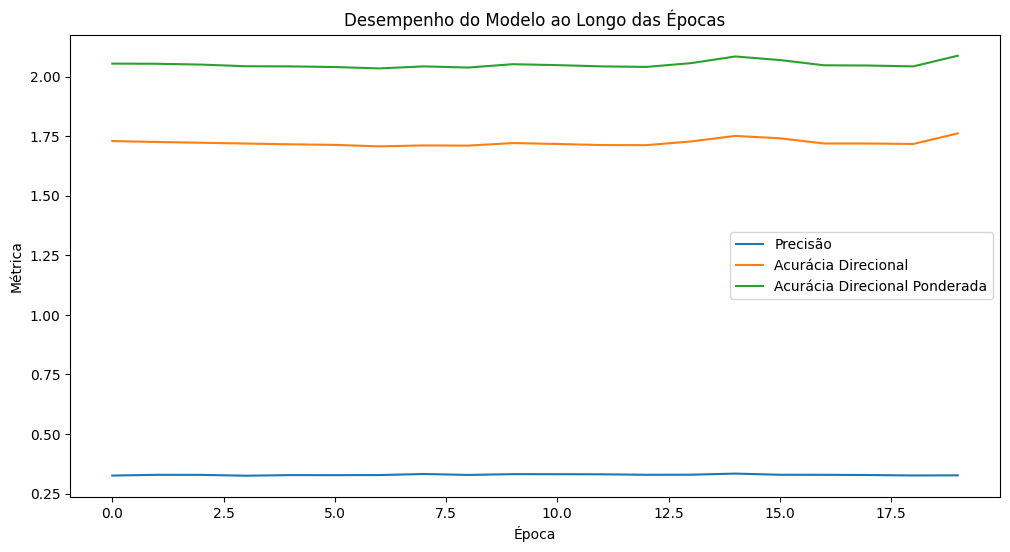

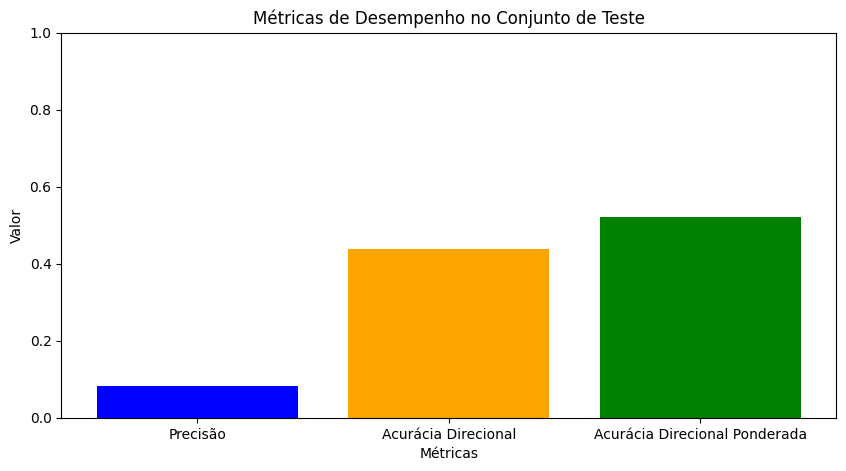

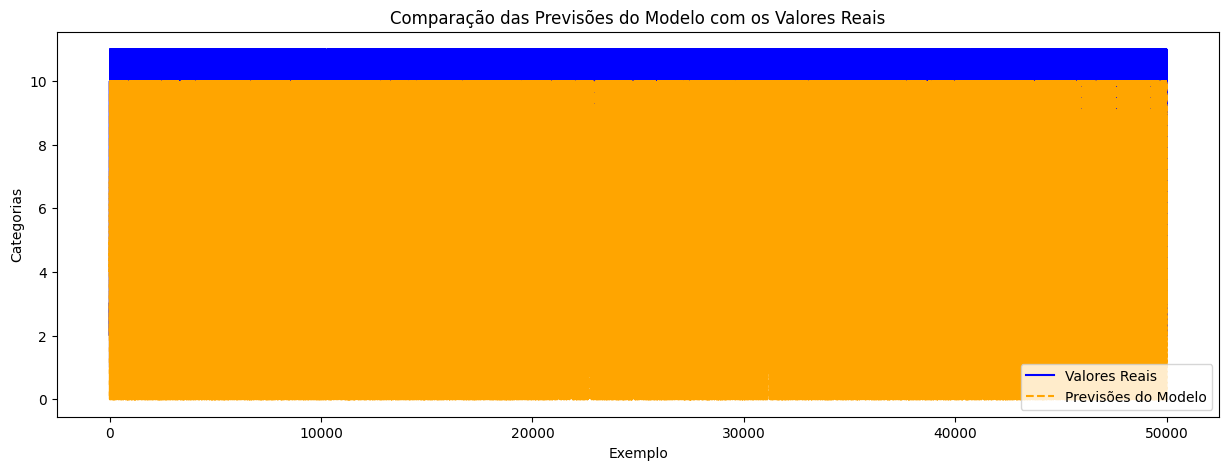

A saída de streaming foi truncada nas últimas 5000 linhas.
1166                          6.7                          5.8   

      odd_categoria_media_movel40  odd_categoria_media_movel80  \
1166                          5.3                          6.0   

      odd_categoria_media_movel160  odd_categoria_media_movel320  \
1166                       5.98125                       5.86875   

      odd_categoria_media_movel640  ...  tendencia_media_movel10  \
1166                      5.982812  ...                     -0.6   

      categoria_frequencia20  entropia_rolling5  entropia_rolling320  \
1166                    11.0           1.609438             2.381962   

      correlacao_odd_categoria_media_movel10  \
1166                               -0.404147   

      correlacao_odd_categoria_media_movel640  categoria_contagem  \
1166                                 0.011932               110.0   

      variancia_rolling10  variancia_rolling20  variancia_rolling320  
1166           

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


class DQNAgent:
  def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon, buffer_size=10000):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        self.memory = deque(maxlen=buffer_size)

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                           loss='sparse_categorical_crossentropy')

  def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(self.n_actions, activation='softmax')
        ])
        return model

  def get_action(self, state):
    if np.random.random() < self.epsilon:
      return np.random.choice(self.n_actions)
    else:
      q_values = self.model.predict(state.reshape(1, -1), batch_size=1)
      return np.argmax(q_values)

  def remember(self, state, action, reward, next_state, done):
    self.memory.append((state, action, reward, next_state, done))

    # Restante do código permanece igual até o método 'replay'
  def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state.reshape(1, -1), batch_size=1)))
            target_f = self.model.predict(state.reshape(1, -1), batch_size=1)
            target_f[0][action] = target
            self.model.fit(state.reshape(1, -1), np.array([action]), epochs=1, verbose=0, batch_size=batch_size)

  def update_epsilon(self, decay_rate, min_epsilon):
    if self.epsilon > min_epsilon:
      self.epsilon *= decay_rate

def calculate_reward(action, true_action):
  base_reward = 10  # Recompensa base para acertos exatos
  good_error_reward = 5  # Recompensa para erros bons
  bad_error_penalty = -5  # Penalidade para erros ruins

  # Recompensas e penalidades adicionais para categorias específicas
  extra_good_reward = 3  # Recompensa adicional para erros bons próximos a categorias valiosas
  extra_bad_penalty = -3  # Penalidade adicional para erros ruins próximos a categorias valiosas
  valuable_categories = [7, 8, 9, 10, 11]

  if action == true_action:
    return base_reward
  elif action < true_action:
    reward = good_error_reward
    if true_action in valuable_categories and action in valuable_categories:
      reward += extra_good_reward  # Recompensa extra por estar próximo de categorias valiosas
    return reward
  else:
    penalty = bad_error_penalty
    if true_action in valuable_categories or action in valuable_categories:
      penalty += extra_bad_penalty  # Penalidade extra por estar distante de categorias valiosas
    return penalty

def converter_para_categoria(odd):
    name = odd
    if name < 1.05:
        odd_categoria = 1
        return odd_categoria
    elif name >= 1.05 and name < 1.15:
        odd_categoria = 2
        return odd_categoria
    elif name >= 1.15 and name < 1.3:
        odd_categoria = 3
        return odd_categoria
    elif name >= 1.3 and name < 1.45:
        odd_categoria = 4
        return odd_categoria
    elif name >= 1.45 and name < 1.7:
        odd_categoria = 5
        return odd_categoria
    elif name >= 1.7 and name < 2.1:
        odd_categoria = 6
        return odd_categoria
    elif name >= 2.1 and name < 2.6:
        odd_categoria = 7
        return odd_categoria
    elif name >= 2.6 and name < 3.5:
        odd_categoria = 8
        return odd_categoria
    elif name >= 3.5 and name < 5:
        odd_categoria = 9
        return odd_categoria
    elif name >= 5 and name < 10:
        odd_categoria = 10
        return odd_categoria
    elif name >= 10:
        odd_categoria = 11
        return odd_categoria

# Função para calcular as features necessárias com base na última odd
def calcular_features(data ,ultima_odd):
    # Copiando a última linha e atualizando com a nova odd
    nova_linha = data.iloc[-1].copy()
    nova_linha['odd_entrada'] = ultima_odd

    nova_linha['odd_categoria_media_movel5'] = data['odd_entrada'].rolling(window=5).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel20'] = data['odd_entrada'].rolling(window=20).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel40'] = data['odd_entrada'].rolling(window=40).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel80'] = data['odd_entrada'].rolling(window=80).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel160'] = data['odd_entrada'].rolling(window=160).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel320'] = data['odd_entrada'].rolling(window=320).mean().iloc[-1]
    nova_linha['odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).mean().iloc[-1]

    # Estatísticas Descritivas
    nova_linha['odd_mediana20'] = data['odd_entrada'].rolling(window=20).median().iloc[-1]

    nova_linha['odd_min10'] = data['odd_entrada'].rolling(window=10).min().iloc[-1]
    nova_linha['odd_min20'] = data['odd_entrada'].rolling(window=20).min().iloc[-1]
    nova_linha['odd_min40'] = data['odd_entrada'].rolling(window=40).min().iloc[-1]

    nova_linha['odd_max10'] = data['odd_entrada'].rolling(window=10).max().iloc[-1]

    # Tendência de Média Móvel
    nova_linha['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff().iloc[-1]

    # Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
    nova_linha['categoria_frequencia20'] = data['odd_entrada'].rolling(window=20).apply(lambda x: x.value_counts().idxmax()).iloc[-1]

    nova_linha['entropia_rolling5'] = data['odd_entrada'].rolling(window=5).apply(lambda x: entropy(x.value_counts(normalize=True))).iloc[-1]
    nova_linha['entropia_rolling320'] = data['odd_entrada'].rolling(window=320).apply(lambda x: entropy(x.value_counts(normalize=True))).iloc[-1]

    # Correlações (exemplo com 'media_movel_segundo5')
    nova_linha['correlacao_odd_categoria_media_movel10'] = data['odd_entrada'].rolling(window=10).corr(data['odd_categoria_media_movel10']).iloc[-1]
    nova_linha['correlacao_odd_categoria_media_movel640'] = data['odd_entrada'].rolling(window=640).corr(data['odd_categoria_media_movel640']).iloc[-1]

    #nova_linha['correlacao_odd_categoria_media_movel10'].replace([np.inf, -np.inf], np.nan, inplace=True)
    #nova_linha['correlacao_odd_categoria_media_movel640'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Contagem de repetições das categorias
    nova_linha['categoria_contagem'] = data['odd_entrada'].map(data['odd_entrada'].value_counts()).iloc[-1]

    nova_linha['variancia_rolling10'] = data['odd_entrada'].rolling(window=10).var().iloc[-1]
    nova_linha['variancia_rolling20'] = data['odd_entrada'].rolling(window=20).var().iloc[-1]
    nova_linha['variancia_rolling320'] = data['odd_entrada'].rolling(window=320).var().iloc[-1]

    # Remova linhas com valores ausentes resultantes das operações de janelas
    #nova_linha = data.fillna(data.mean())

    # Verifique se há valores nulos em cada coluna
    valores_ausentes = data.isna().sum()

    # Exiba as colunas com valores nulos e suas contagens
    print(valores_ausentes[valores_ausentes > 0])

    features = pd.DataFrame([nova_linha])

    #print(features)
    # Retornando a última linha com as features atualizadas
    return features

def normalizar_features(features):
    scaler = StandardScaler()
    # Converter a primeira entrada da lista para um DataFrame
    #print(type(features), len(features), features.columns)
    # Selecionar as colunas desejadas para normalização
    features_selecionadas = features[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',]]

    # Normalizar as features selecionadas
    x = scaler.fit_transform(features_selecionadas)
    return x

def normalize_data(features):
  scaler = StandardScaler()
  return scaler.fit_transform(features)

def main(data):
  # Recursos (variáveis de entrada)
  features = data[['odd_entrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',]].values

    # Recompensas (variável de saída)
  rewards = data['Odd_Categoria'].values
  features = normalize_data(features)
    # Separe os dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Parâmetros de treinamento
  n_epochs = 20  # Número de épocas de treinamento
  batch_size = 64  # Tamanho do lote para treinamento

  # Crie o agente DQN
  n_states = X_train.shape[1]
  n_actions = len(np.unique(y_train))
  dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=1.0, buffer_size=5000)

  epoch_accuracies = []
  epoch_directional_accuracies = []
  epoch_weighted_directional_accuracies = []

  # Treinamento do agente
  for epoch in range(n_epochs):
      # Inicializa as métricas para cada época
      correct_predictions, overestimations, weighted_correct_predictions, weighted_overestimations = 0, 0, 0, 0

      for i in range(len(X_train) - 1):
          state = X_train[i, :]
          action = dqn_agent.get_action(state)
          true_action = y_train[i]
          reward = calculate_reward(action, true_action)
          next_state = X_train[i + 1, :]
          done = (i == len(X_train) - 2)

          dqn_agent.remember(state, action, reward, next_state, done)

          if done:
              dqn_agent.replay(batch_size)
              dqn_agent.update_epsilon(0.995, 0.01)

          # Atualiza as métricas
          if action == true_action:
              correct_predictions += 1
              weighted_correct_predictions += 2  # Peso maior para acertos exatos
          elif action > true_action:
              overestimations += 1
              weighted_overestimations += 1  # Peso menor para erros

      # Calcula as métricas para a época
      epoch_accuracy = correct_predictions / len(X_test)
      epoch_directional_accuracy = (correct_predictions + overestimations) / len(X_test)
      epoch_weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

      epoch_accuracies.append(epoch_accuracy)
      epoch_directional_accuracies.append(epoch_directional_accuracy)
      epoch_weighted_directional_accuracies.append(epoch_weighted_directional_accuracy)

  # Inicialize listas para coletar dados de erro
  erros = []
  tipos_de_erro = {'subestimacao': [], 'superestimacao': []}
  # Teste o agente
  correct_predictions = 0
  overestimations = 0
  weighted_correct_predictions = 0
  weighted_overestimations = 0

  predicted_actions = []

  for i in range(len(X_test)):
    state = X_test[i, :]
    action = dqn_agent.get_action(state)
    true_action = y_test[i]

    predicted_actions.append(action)

    # Cálculo do erro
    erro = action - true_action
    erros.append(erro)

    # Classificando o tipo de erro
    if erro < 0:
      tipos_de_erro['subestimacao'].append(erro)
    elif erro > 0:
      tipos_de_erro['superestimacao'].append(erro)

    # Atualize as métricas
    if action == true_action:
      correct_predictions += 1
      weighted_correct_predictions += 2  # Peso maior para acertos
    elif action > true_action:
      overestimations += 1
      weighted_overestimations += 1  # Peso menor para erros

    # Calcule a precisão
  accuracy = correct_predictions / len(X_test)

    # Calcule a Acurácia Direcional
  directional_accuracy = (correct_predictions + overestimations) / len(X_test)

    # Calcule a Acurácia Direcional Ponderada
  weighted_directional_accuracy = (weighted_correct_predictions + weighted_overestimations) / len(X_test)

  print("Precisão:", accuracy)
  print("Acurácia Direcional:", directional_accuracy)
  print("Acurácia Direcional Ponderada:", weighted_directional_accuracy)

  # Gráfico das métricas

  plt.figure(figsize=(12, 6))
  plt.plot(epoch_accuracies, label='Precisão')
  plt.plot(epoch_directional_accuracies, label='Acurácia Direcional')
  plt.plot(epoch_weighted_directional_accuracies, label='Acurácia Direcional Ponderada')
  plt.xlabel('Época')
  plt.ylabel('Métrica')
  plt.title('Desempenho do Modelo ao Longo das Épocas')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 5))
  metrics = [accuracy, directional_accuracy, weighted_directional_accuracy]
  metric_labels = ['Precisão', 'Acurácia Direcional', 'Acurácia Direcional Ponderada']
  colors = ['blue', 'orange', 'green']
  plt.bar(metric_labels, metrics, color=colors)
  plt.xlabel('Métricas')
  plt.ylabel('Valor')
  plt.title('Métricas de Desempenho no Conjunto de Teste')
  plt.ylim(0, 1)  # As métricas de acurácia devem estar entre 0 e 1
  plt.show()

  # Gráfico de linha das previsões vs reais
  # Criando um eixo x que é uma sequência de inteiros do mesmo tamanho que y_test
  x_axis = np.arange(len(y_test))
  plt.figure(figsize=(15, 5))
  plt.plot(x_axis, y_test, label='Valores Reais', color='blue')
  plt.plot(x_axis, predicted_actions, label='Previsões do Modelo', color='orange', linestyle='--')
  plt.xlabel('Exemplo')
  plt.ylabel('Categorias')
  plt.title('Comparação das Previsões do Modelo com os Valores Reais')
  plt.legend()
  plt.show()

  dqn_agent.model.save('AgenteAv.h5')

  data = data.tail(700).reset_index(drop=True)
  data

  resultados = pd.DataFrame()

  # Loop principal para predições
  for i in range(1000):
    print(48*'*-' + '*')
    print(i)
    ultima_odd = float(input("Insira a última odd: "))
    if ultima_odd == 0:
      break

    # Atualizar a entrada mais recente com a última odd
    categoria_real = converter_para_categoria(ultima_odd)

    if i != 0:
      data.loc[len(data)-2, 'Odd_Categoria'] = categoria_real

    # Calcular features para a nova entrada
    nova_feature = calcular_features(data, categoria_real)
    features_normalizadas = normalizar_features(nova_feature)

    # Substitua esta linha pelo agente DQN para fazer a predição
    categoria_prevista = dqn_agent.get_action(features_normalizadas.reshape(1, -1))

    # Atualizar a categoria prevista na última entrada
    nova_feature['Odd_Categoria'] = categoria_prevista

    print("Categoria Prevista:", categoria_prevista)
    # Adicionar a linha com as features e a predição ao DataFrame de resultados
    resultados = resultados.append(nova_feature, ignore_index=True)

    # Concatenar a nova linha ao DataFrame principal
    data = pd.concat([data, nova_feature], ignore_index=True)
    print(nova_feature)
  # Salvar resultados em um arquivo CSV
  resultados.to_csv('resultados_predicoes.csv', index=False)
  data.to_csv('predicoes.csv', index=False)


if __name__ == "__main__":
  print(data)
  main(data)
